# Keras 

##### Classification-based approach with deep neural network

## Load Packages

In [34]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

import keras_tuner as kt


tf.__version__

'2.8.1'

In [35]:
# import dataset 
raw_dataset = pd.read_csv("car_prices.csv", on_bad_lines="skip")


In [36]:
df = raw_dataset.copy()

In [37]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [39]:
# drop column with too many missing values
df = df.drop(['transmission'], axis=1)

In [40]:
# drop remaining row with one missing value
df = df.dropna()

In [41]:
# Drop irrelevant features
df = df.drop(['trim', 'vin', 'mmr', 'saledate', 'seller'], axis=1)

In [42]:
# rename columns
df = df.rename(columns={
"make" : "brand",
"body" : "type",
"odometer" : "miles"} 
    )

In [43]:
# transform into lowercase
df["brand"] = df["brand"].str.lower()
df["model"] = df["model"].str.lower()
df["type"] = df["type"].str.lower()

## Define label

In [44]:
y_label = 'sellingprice'

## Data format

In [45]:
# Make a dictionary with int64 features as keys and np.int32 as values
int_32 = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
# Change all columns from dictionary
df = df.astype(int_32)

# Make a dictionary with float64 columns as keys and np.float32 as values
float_32 = dict.fromkeys(df.select_dtypes(np.float64).columns, np.float32)
df = df.astype(float_32)

In [46]:
int_32

{'year': numpy.int32, 'sellingprice': numpy.int32}

In [47]:
# Convert to categorical

# make a list of all categorical variables
cat_convert = ["brand", "model", "type", "state", "color", "interior"]

# convert variables
for i in cat_convert:
    df[i] = df[i].astype("string")

In [48]:
# Convert to category

df['year'] = df['year'].astype("category")
df['condition'] = df['condition'].astype("category")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          533660 non-null  category
 1   brand         533660 non-null  string  
 2   model         533660 non-null  string  
 3   type          533660 non-null  string  
 4   state         533660 non-null  string  
 5   condition     533660 non-null  category
 6   miles         533660 non-null  float32 
 7   color         533660 non-null  string  
 8   interior      533660 non-null  string  
 9   sellingprice  533660 non-null  int32   
dtypes: category(2), float32(1), int32(1), string(6)
memory usage: 33.6 MB


In [50]:
# Make list of all numerical data (except label)
list_num = df.drop(columns=[y_label]).select_dtypes(include=[np.number]).columns.tolist()

# Make list of all categorical data which is stored as integers (except label)
list_cat_int = df.drop(columns=[y_label]).select_dtypes(include=['category']).columns.tolist()

# Make list of all categorical data which is stored as string (except label)
list_cat_string = df.drop(columns=[y_label]).select_dtypes(include=['string']).columns.tolist()

In [51]:
list_num

['miles']

In [52]:
list_cat_int

['year', 'condition']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          533660 non-null  category
 1   brand         533660 non-null  string  
 2   model         533660 non-null  string  
 3   type          533660 non-null  string  
 4   state         533660 non-null  string  
 5   condition     533660 non-null  category
 6   miles         533660 non-null  float32 
 7   color         533660 non-null  string  
 8   interior      533660 non-null  string  
 9   sellingprice  533660 non-null  int32   
dtypes: category(2), float32(1), int32(1), string(6)
memory usage: 33.6 MB


## Data Splitting

In [55]:
# Make test data
df_test = df.sample(frac=0.2, random_state=1337)

# Create training data
df_train = df.drop(df_test.index)

In [56]:
print(
    "Using %d samples for training and %d for validation"
    % (len(df_train), len(df_test))
)

Using 426928 samples for training and 106732 for validation


## Transform to Tensors

In [57]:
# Define a function to create our tensors

def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop(y_label) #pick y_label and delete
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels)) #ds for tensors
    if shuffle:
        ds = ds.shuffle(buffer_size=10000) #len(dataframe)
    ds = ds.batch(batch_size)
    df = ds.prefetch(batch_size)
    return ds

In [58]:
batch_size = 32

ds_train = dataframe_to_dataset(df_train, shuffle=True, batch_size=batch_size)
ds_test = dataframe_to_dataset(df_test, shuffle=True, batch_size=batch_size)

/Users/hendrikpfeifer/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/tensorflow/python/data/util/structure.py:485: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  raise TypeError("Could not build a `TypeSpec` for {} with type {}".format(
/Users/hendrikpfeifer/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/tensorflow/python/data/util/structure.py:485: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  raise TypeError("Could not build a `TypeSpec` for {} with type {}".format(


In [59]:
ds_train

<BatchDataset element_spec=({'year': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'brand': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'model': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'type': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'state': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'condition': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'miles': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'color': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'interior': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Feature preprocessing
### Numerical preprocessing function

In [60]:
# Define numerical preprocessing function
def get_normalization_layer(name, dataset):
    
    # Create a Normalization layer for our feature
    normalizer = layers.Normalization(axis=None)

    # Prepare a dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    return normalizer

### Categorical preprocessing function

In [61]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens) #, output_mode='multi_hot'

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

### Data preprocessing

In [62]:
all_inputs = []
encoded_features = []

### Numercial preprocessing

In [63]:
# Numerical features
for feature in list_num:
  numeric_feature = tf.keras.Input(shape=(1,), name=feature)
  normalization_layer = get_normalization_layer(feature, ds_train)
  encoded_numeric_feature = normalization_layer(numeric_feature)
  all_inputs.append(numeric_feature)
  encoded_features.append(encoded_numeric_feature)

In [64]:
encoded_features

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_2')>]

### Categorical preprocessing

In [65]:
for feature in list_cat_int:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='int32')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='int32',
                                               max_tokens=None)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

In [66]:
for feature in list_cat_string:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='string')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='string',
                                               max_tokens=None)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

In [67]:
#Merge
all_features = layers.concatenate(encoded_features)

In [68]:
all_features

<KerasTensor: shape=(None, 974) dtype=float32 (created by layer 'concatenate')>

In [69]:
all_inputs


[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'miles')>,
 <KerasTensor: shape=(None, 1) dtype=int32 (created by layer 'year')>,
 <KerasTensor: shape=(None, 1) dtype=int32 (created by layer 'condition')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'brand')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'model')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'type')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'state')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'color')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'interior')>]

In [70]:
# First layer
x = layers.Dense(32, activation="relu")(all_features)

# Dropout to prevent overvitting - soll sich auf die wichtigsten konzentrieren
x = layers.Dropout(0.5)(x)

# Output layer
output = layers.Dense(1)(x)

# Group all layers 
model = tf.keras.Model(all_inputs, output)

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 year (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 condition (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 brand (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 model (InputLayer)             [(None, 1)]          0           []                               
                                                                                              

In [72]:
model.compile(optimizer="adam", 
              loss ="mse", 
              metrics=["mean_absolute_error"])
              

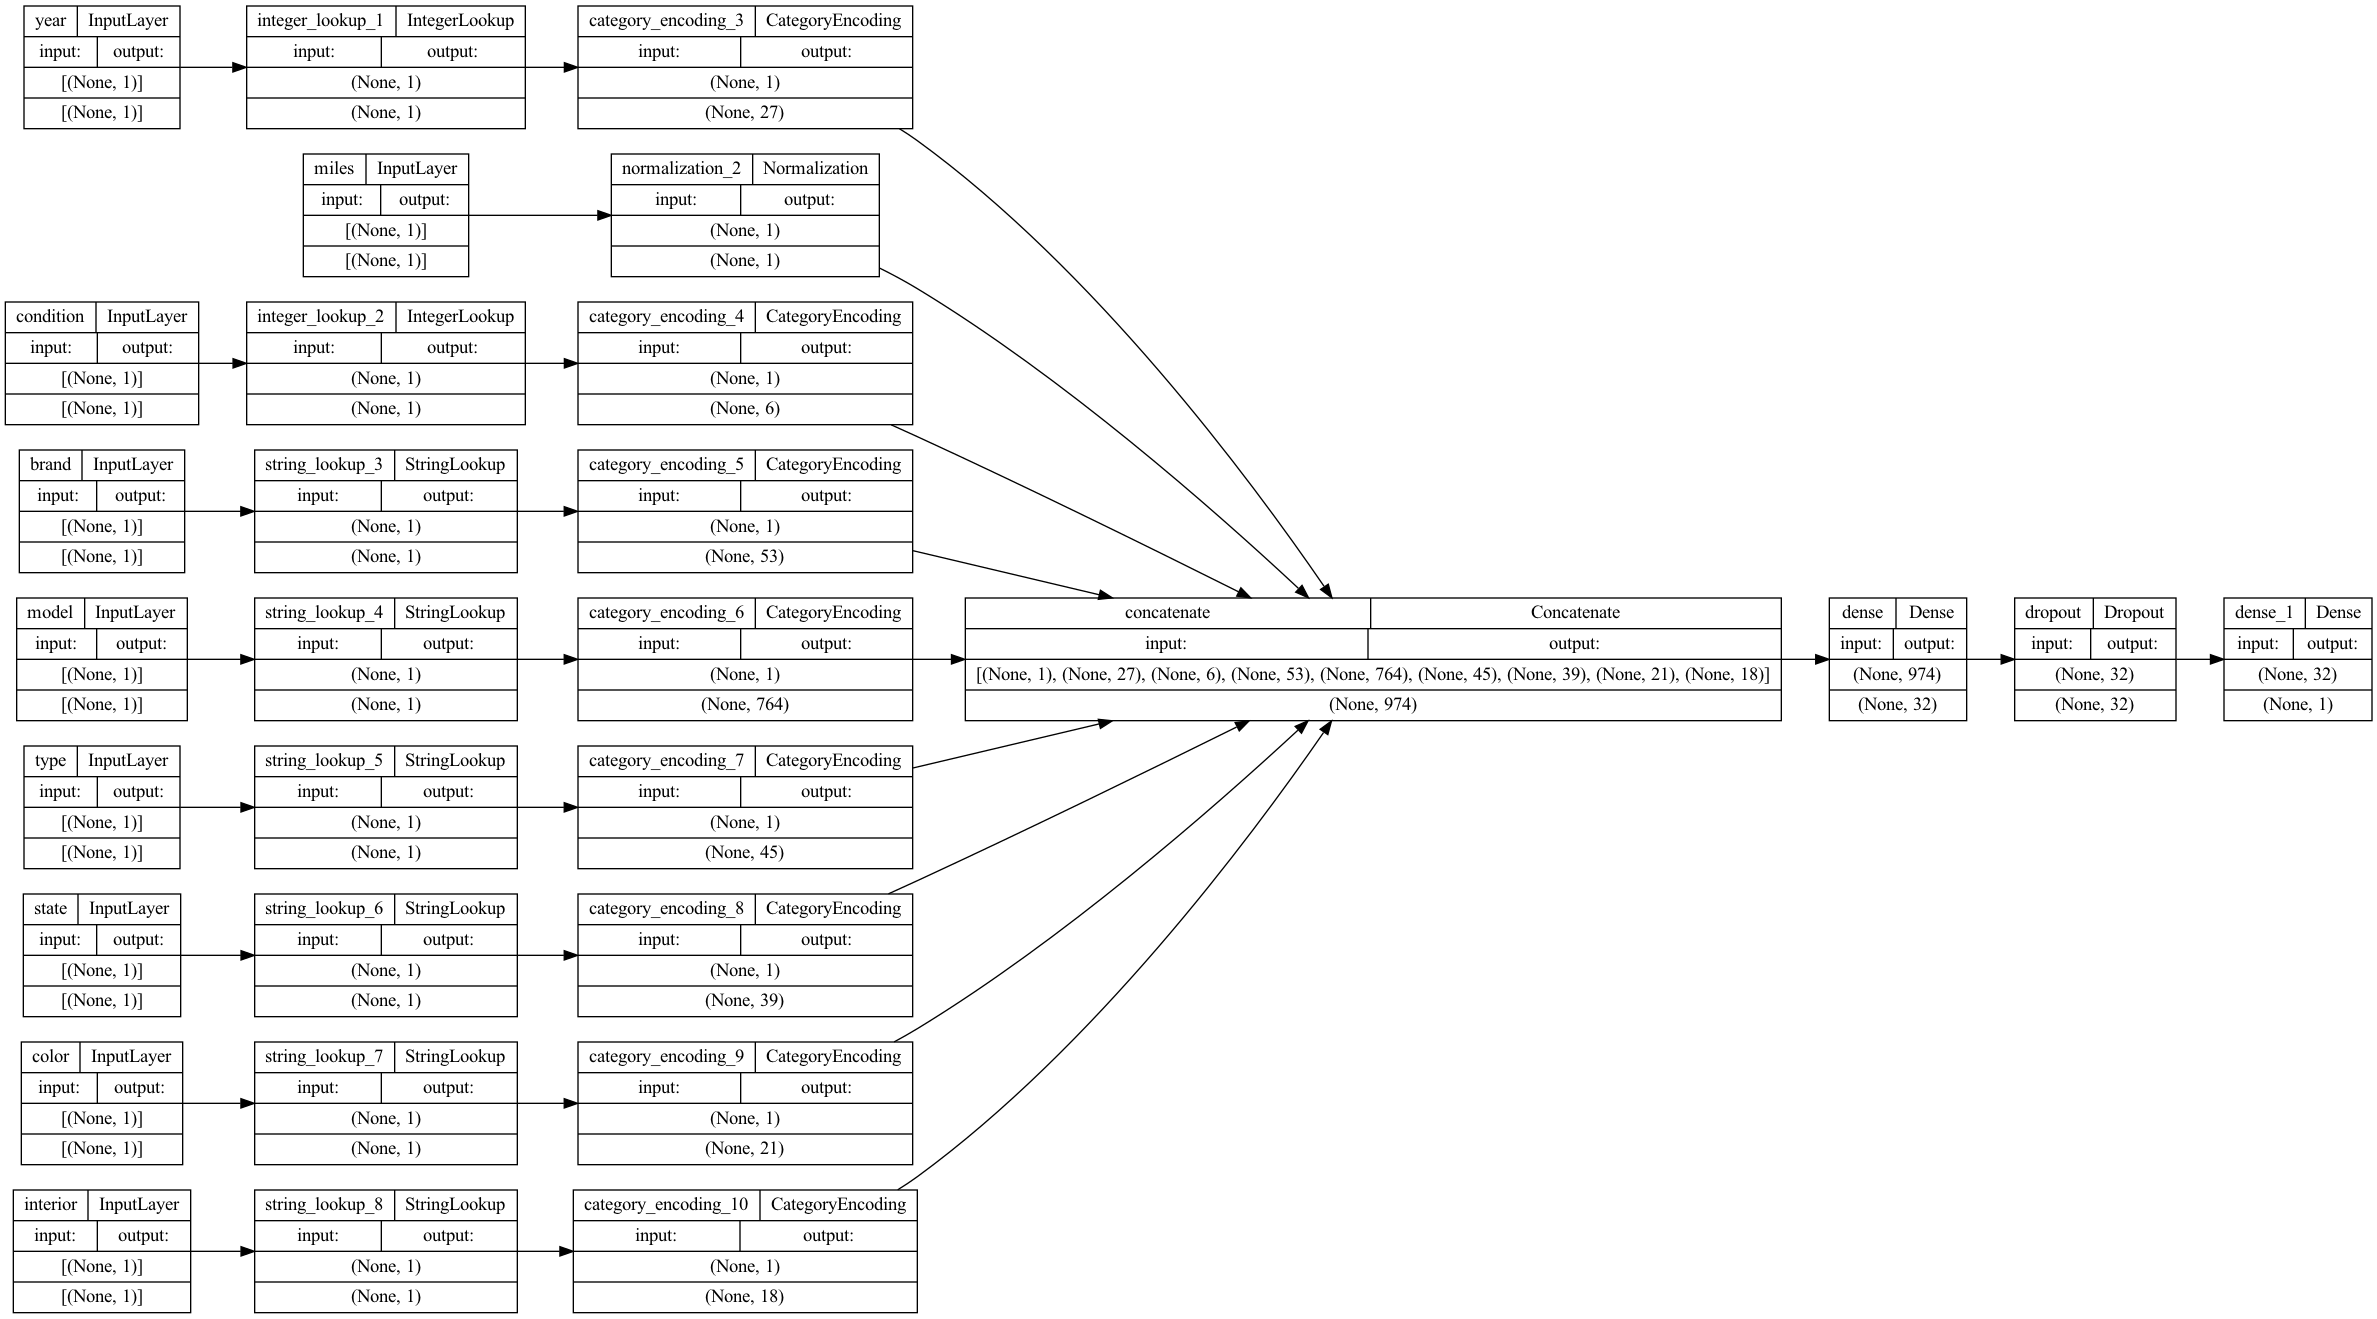

In [73]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Training

In [74]:
# will stop training when there is no improvement in 3 consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [75]:
model.fit(ds_train, 
            epochs=50, 
            validation_data=ds_test, 
            callbacks=[callback]
            )

Epoch 1/50
13342/13342 [==============================] - 35s 3ms/step - loss: 152275808.0000 - mean_absolute_error: 8808.7422 - val_loss: 56295200.0000 - val_mean_absolute_error: 4911.3462
Epoch 2/50
13342/13342 [==============================] - 35s 3ms/step - loss: 59351148.0000 - mean_absolute_error: 5068.6060 - val_loss: 37074240.0000 - val_mean_absolute_error: 3694.5410
Epoch 3/50
13342/13342 [==============================] - 35s 3ms/step - loss: 49639792.0000 - mean_absolute_error: 4579.6631 - val_loss: 30598140.0000 - val_mean_absolute_error: 3232.2419
Epoch 4/50
13342/13342 [==============================] - 35s 3ms/step - loss: 44800732.0000 - mean_absolute_error: 4325.5830 - val_loss: 26991852.0000 - val_mean_absolute_error: 2962.8081
Epoch 5/50
13342/13342 [==============================] - 35s 3ms/step - loss: 41898644.0000 - mean_absolute_error: 4170.7861 - val_loss: 24746158.0000 - val_mean_absolute_error: 2799.0955
Epoch 6/50
13342/13342 [==============================

In [76]:
#im "echten" die testdaten nehmen
loss, accuracy = model.evaluate(ds_test)

print("MAE:", round(accuracy, 2))

3336/3336 [==============================] - 7s 2ms/step - loss: 10889204.0000 - mean_absolute_error: 1854.7891
MAE: 1854.79


## Perform inference

In [77]:
model.save('my_car_model-mean-absolute-3')

2022-06-22 10:46:31.861446: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_car_model-mean-absolute-3/assets


In [78]:
reloaded_model = tf.keras.models.load_model('my_car_model-mean-absolute-3')

In [79]:
df.head()



,year,brand,model,type,state,condition,miles,color,interior,sellingprice
0,2015,kia,sorento,suv,ca,5.0,16639.0,white,black,21500
1,2015,kia,sorento,suv,ca,5.0,9393.0,white,beige,21500
2,2014,bmw,3 series,sedan,ca,4.5,1331.0,gray,black,30000
3,2015,volvo,s60,sedan,ca,4.1,14282.0,white,black,27750
4,2014,bmw,6 series gran coupe,sedan,ca,4.3,2641.0,gray,black,67000


In [81]:
sample = {
    "year": 2014,
    "brand": "bmw",
    "model": "3 series",
    "type": "sedan",
    "state": "ca",
    "condition": 4.5,
    "miles": 1331.0,
    "color": "gray",
    "interior": "black",
}

In [82]:
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}

In [83]:
predictions = reloaded_model.predict(input_dict)

In [84]:
pred_list = predictions.tolist()

In [85]:
pred_list

[[28013.486328125]]

In [86]:
z = (str(pred_list)[2:-2])

In [87]:
z = float(z)

In [88]:
print(float(round(z,2)))

28013.49
